


Epoch 1/20

46/46 [==============================] - 4s 23ms/step - loss: 0.0269 - val_loss: 0.0013
Epoch 2/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 3/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 9.8025e-04
Epoch 10/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 9.6739e-04
Epoch 

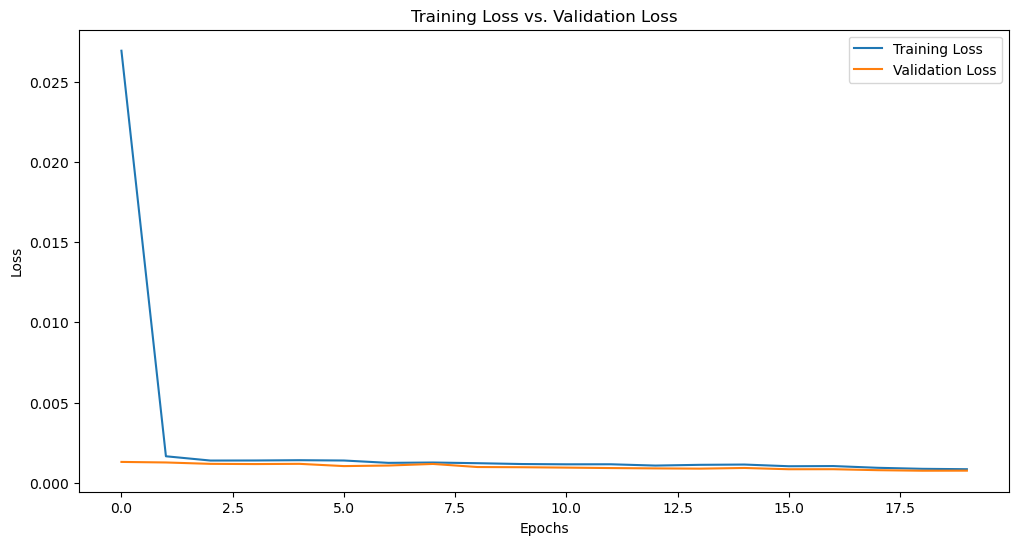

12/12 [==============================] - 0s 3ms/step - loss: 7.5389e-04
Mean Squared Error on Test Set: 0.0007538903737440705
57/57 [==============================] - 0s 3ms/step


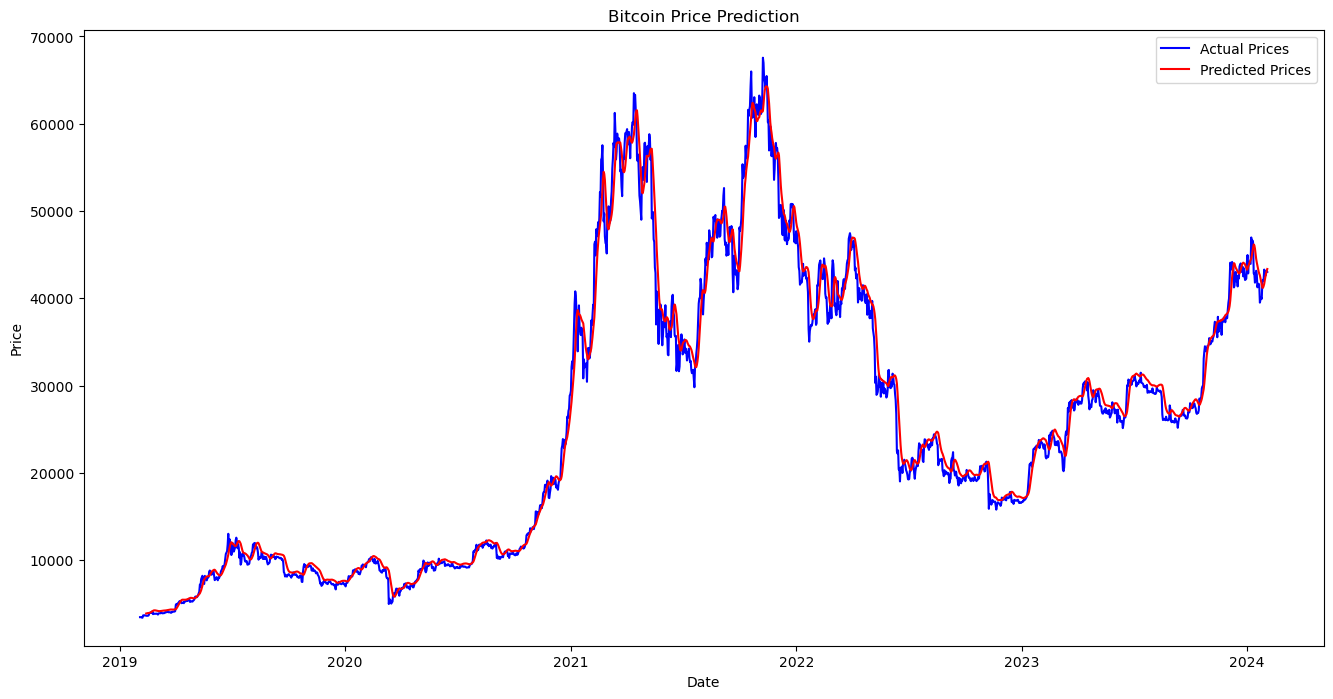

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Preprocessing
def preprocess_data(file_path):
    # Load historical Bitcoin price data
    data = pd.read_csv(file_path)

    # Keep only the 'Close' prices and date
    data = data[['Date', 'Close']]

    # Convert 'Date' to datetime format
    data['Date'] = pd.to_datetime(data['Date'])

    # Sort by date
    data = data.sort_values('Date')

    # Set 'Date' as the index
    data.set_index('Date', inplace=True)

    return data

def scale_data(data):
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    return scaler, scaled_data

def create_sequences_targets(scaled_data, sequence_length):
    sequences = []
    targets = []

    for i in range(len(scaled_data) - sequence_length):
        sequences.append(scaled_data[i:i + sequence_length, 0])
        targets.append(scaled_data[i + sequence_length, 0])

    X = np.array(sequences)
    y = np.array(targets)

    # Reshape X for LSTM input (samples, time steps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y

# Postprocessing
def inverse_scale_and_plot(data, scaled_data, all_predictions, sequence_length, scaler):
    # Inverse scale the predictions
    all_predictions = model.predict(X)
    all_predictions = scaler.inverse_transform(all_predictions)

    # Plot the results
    plt.figure(figsize=(16, 8))
    plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices', color='blue')
    plt.plot(data.index[sequence_length:], all_predictions, label='Predicted Prices', color='red')
    plt.title('Bitcoin Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Main part of the code
file_path = 'BTC-USD.csv'
sequence_length = 10

# Preprocess data
data = preprocess_data(file_path)

# Scale data
scaler, scaled_data = scale_data(data)

# Create sequences and targets
X, y = create_sequences_targets(scaled_data, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

# Make predictions on the entire dataset and plot the results
all_predictions = model.predict(X)
inverse_scale_and_plot(data, scaled_data, all_predictions, sequence_length, scaler)
